In [1]:
import matlab
import matlab.engine
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

![iamge](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q1.PNG)

In [15]:
#######################################################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q2.PNG)

In [16]:
# Assets A1.A2.A3

m = np.array([[0.10],[0.20],[0.15]]) # construct matrix

C = np.array([[0.005,-0.010,0.004],[-0.010,0.040,-0.002],[0.004,-0.002,0.023]]) # construct matrix

E = np.zeros((100,1))   # Expected return E from the portfoli
V = np.zeros((100,1))   # Variance
w = np.zeros((100,3))   # Weight

N = 100
y = random.rand(N,3)  # 100X3 random matrix between 0~1
for i in range (0,N):
    # calculate the weight
    w[i] = y[i,] / sum(y[i,]) 
    # calculate the expected return
    E[i] = np.dot(w[i] , m)  
    # calculate the Variance
    kk = np.dot(w[i] , C)
    w_T = np.reshape(w[i], (3, -1))
    V[i] = np.sqrt(np.dot(kk , w_T))

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/S1.PNG)

In [4]:
eng = matlab.engine.start_matlab("-desktop") # Use Finance toolbox in Matlab to calculate the Efficient Portfolio

p = Portfolio;

p = setAssetMoments(p, m, C);

p = setDefaultConstraints(p);

[y,x] = plotFrontier(p);

In [18]:
# obtain data from matlab
x = eng.workspace['x']
y = eng.workspace['y']

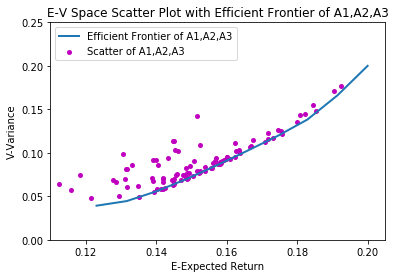

In [38]:
f1 = plt.figure(1)
plt.plot(x,y, linewidth = '2', label = "Efficient Frontier of A1,A2,A3")
plt.scatter(E,V, c='m', marker='.', linewidths= '2', label = "Scatter of A1,A2,A3")
plt.legend(loc='upper left')
#plt.grid()
plt.title('E-V Space Scatter Plot with Efficient Frontier of A1,A2,A3')  
plt.ylabel("V-Variance")  
plt.xlabel("E-Expected Return")
# plt with same scale
plt.ylim(0,0.25)
plt.xlim(0.11,0.205)
plt.savefig("E-V Space Scatter Plot with Efficient Frontier of A1,A2,A3.PNG", dpi = 600)
plt.show()

In [ ]:
eng.quit()